In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("C:/Users/anamo/Documents/Análisis de datos/Equipo/project-da-promo-49-modulo-3-team-5/fase_2_transformacion/df_final.csv",index_col=0) 
df.sample(4)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
598,599,32,No,travel_rarely,652.27,NaN,9,4,NaN,1,female,81.530000,3,2,research scientist,4,married,5545.233631,13697.67,1,no,12,3.000000,4,full time,1,6.000000,2,2.761004,6,NaN,0,5,1991,63220.00,no
1295,1296,28,No,travel_rarely,470.27,NaN,17,2,NaN,3,male,58.780000,3,2,laboratory technician,1,NaN,3798.330000,9875.67,1,no,12,3.000000,4,part time,1,10.000000,2,2.751823,10,NaN,1,8,1995,45580.00,no
1273,1274,31,No,travel_rarely,556.26,research & development,23,3,medical,2,male,69.530706,2,2,healthcare representative,4,NaN,4492.840000,11681.39,0,no,21,3.153334,2,part time,1,10.000000,2,3.000000,9,NaN,7,8,1992,53914.11,yes
1152,1153,23,No,non_travel,290.04,NaN,12,2,NaN,4,male,36.250000,3,1,laboratory technician,4,single,2342.590000,6090.75,1,no,13,3.000000,3,part time,0,6.258219,6,4.000000,5,NaN,1,4,2000,28111.13,yes


1. Identificar y contabilizar los nulos en las columnas

In [3]:
colum_nulos = df.isnull().sum() 
colum_nulos

employee_id                    0
age                            0
attrition                      0
businesstravel                 0
$_dailyrate                    0
department                  1312
distancefromhome               0
education                      0
educationfield               745
environmentsatisfaction        0
gender                         0
$_hourlyrate                   0
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                651
$_monthlyincome                0
$_monthlyrate                  0
numcompaniesworked             0
overtime                       0
%_percentsalaryhike            0
performancerating              0
relationshipsatisfaction       0
standardhours                  0
stockoptionlevel               0
totalworkingyears              0
trainingtimeslastyear          0
worklifebalance                0
yearsatcompany                 0
yearsincur

In [4]:
df_nulos = pd.DataFrame(colum_nulos, columns = ["cantidad_nulos"])

df_nulos[df_nulos["cantidad_nulos"] > 0]

,cantidad_nulos
department,1312
educationfield,745
maritalstatus,651
yearsincurrentrole,1580


3. Identificar columnas categoricas.

In [5]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['department', 'educationfield', 'maritalstatus'], dtype='object')


4. Identificar los valores que dominan en una fila categorica.

In [6]:
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna DEPARTMENT


department
research & development     0.121437
sales                      0.056382
human resources            0.009294
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


educationfield
life sciences       0.216233
medical             0.171004
marketing           0.064436
technical degree    0.042751
other               0.036555
human resources     0.007435
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


maritalstatus
married     0.271995
single      0.201363
divorced    0.123296
Name: count, dtype: float64

........................


5. Clasificar las columnas.

In [7]:
columnas_moda = ["overtime", "standardhours" ]
columnas_desconocido = ['department', 'educationfield', 'maritalstatus']

6. Reemplazar por la moda.

In [8]:
# iteramos por la lista creada en el paso anterior:
for columna in columnas_moda:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = df[columna].mode()[0]    
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    df[columna] = df[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


overtime         0
standardhours    0
dtype: int64

7. Reemplazar por None.

In [9]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "None"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor "None" para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("None")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


department        0
educationfield    0
maritalstatus     0
dtype: int64

8. Identificar columnas numericas.

In [10]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['yearsincurrentrole'], dtype='object')


9. Calcular el número de nulos en cada columna numerica

In [11]:
for col in nulos_esta_num:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna YEARSINCURRENTROLE


yearsincurrentrole
2.0     0.006815
7.0     0.003098
0.0     0.002478
4.0     0.001859
1.0     0.001859
11.0    0.001239
6.0     0.001239
3.0     0.001239
13.0    0.000620
12.0    0.000620
Name: count, dtype: float64

........................


In [12]:
df[nulos_esta_num].isnull().sum() / df.shape[0]

yearsincurrentrole    0.978934
dtype: float64

10. Revisar si dentro de las columnas donde tenemos nulos hay valores atípicos. 
`Para hacer esto lo mejor es usar graficas`.

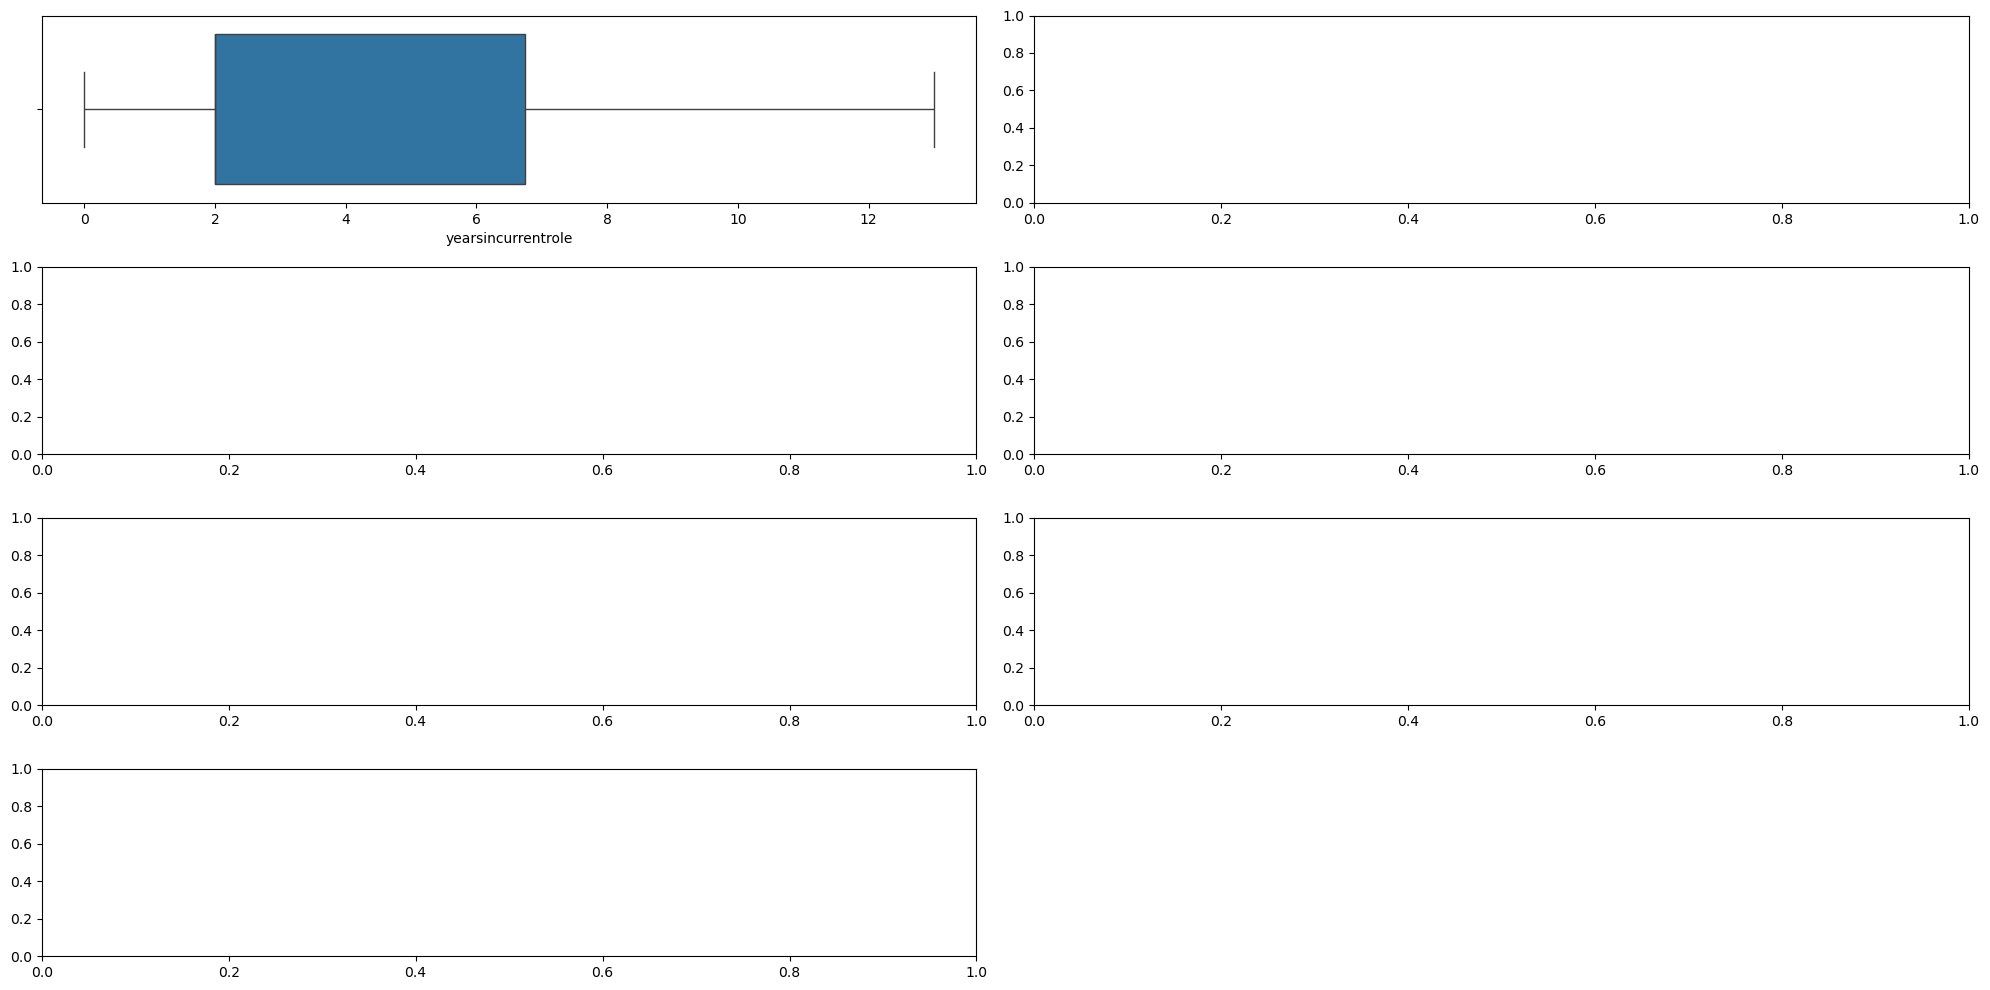

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

* Los OUTLIERS son todos aquellos puntos que se ven más allá de los bigotes de las gráficas, por lo tanto, tenemos valores atípicos en las columnas de `$_hourlyrate`, `$_monthlyincome`, `performancerating`, `totalworkingyears`, `$_salary`. Las columnas tienen valores atípicos por lo que optaremos por reemplazar los nulos con métodos más avanzados como KNNImputer o IterativeImputer. 

* Los porcentajes de valores nulos en las columnas worklifebalance y yearsincurrentrole son bastante altos:
   ** worklifebalance: 6.69%
   ** yearsincurrentrole: 97.89%

* Para yearsincurrentrole, debido al alto porcentaje de nulos, es posible que esta columna no sea útil para el análisis. Considera eliminar esta columna si no es esencial.

* Aunque el porcentaje de nulos en worklifebalances es menor que en yearsincurrentrole, sigue siendo significativo.

11. Realizar una copia para hacer una conparativa con la estadistica del archivo original.

In [14]:
df_final = df.copy()
df_final.sample(2)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
818,819,24,No,travel_rarely,556.26,sales,3,2,other,1,female,69.530483,3,2,sales executive,3,married,4492.84,11681.39,0,no,21,4.0,1,part time,1,4.0,2,2.0,3,NaN,0,2,1999,53914.11,yes
1592,1593,45,No,travel_rarely,684.25,None,2,2,None,2,male,85.530554,1,2,sales representative,3,single,5526.67,14369.33,0,no,13,3.0,1,full time,0,9.0,3,3.0,8,NaN,3,1,1978,66320.00,yes


12. Para yearsincurrentrole, debido al alto porcentaje de nulos, no se considera eliminar esta columna, se remplazara por None.

In [15]:
# reemplazamos los nulos por el valor "None" para cada una de las filas de la columna
df_final["yearsincurrentrole"] = df_final["yearsincurrentrole"].fillna("None")
    
# comprobamos si quedan nulos en la columna. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_final["yearsincurrentrole"].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


0

13. Por lo antes dicho, se toma al INTERATIVEIMPUTER como metodo avanzado para reemplazar los nulos.

In [16]:
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42) #max_iter=20 especifica el número máximo de iteraciones/ random_state=42 asegura la reproducibilidad de los resultados.

# fit_transform() ajusta el modelo IterativeImputer a los datos seleccionados y luego transforma los datos imputando los valores faltantes.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[2.51967241e+02, 1.62808300e+04, 3.00000000e+00, 3.00372319e+01,
        3.00000000e+00, 1.95370000e+05],
       [2.57925812e+02, 1.71135630e+04, 3.00000000e+00, 3.40000000e+01,
        3.00000000e+00, 1.99990000e+05],
       [2.48033352e+02, 1.64648491e+04, 3.00000000e+00, 2.20000000e+01,
        2.80232575e+00, 1.92320000e+05],
       ...,
       [1.29060332e+02, 8.66226353e+03, 3.00000000e+00, 9.00000000e+00,
        3.00000000e+00, 1.00071840e+05],
       [6.95307819e+01, 4.49284000e+03, 3.15420498e+00, 1.20000000e+01,
        3.00000000e+00, 5.39141100e+04],
       [1.39865977e+02, 9.03750000e+03, 3.00000000e+00, 1.76799131e+01,
        3.00000000e+00, 1.08450000e+05]])

14. Se comprueba si tenemos nulos.

In [17]:
df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
$_hourlyrate         0
$_monthlyincome      0
performancerating    0
totalworkingyears    0
worklifebalance      0
$_salary             0
dtype: int64 nulos


15. Comparación de estadistica.

In [18]:
df_final.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,84.043307,5709.878992,3.150839,11.530297,2.759417,65166.755068
std,55.732313,5680.146296,0.335680,7.283874,0.678701,43213.185709
min,13.010000,1000.000000,3.000000,0.000000,1.000000,10090.000000
25%,36.252663,2467.479016,3.000000,6.258229,2.000000,28111.130000
50%,69.530662,4492.840000,3.000000,10.000000,3.000000,53914.110000
75%,107.268103,8008.540000,3.118313,15.000000,3.000000,83174.529201
max,275.542095,94083.000000,4.000000,40.000000,4.000000,213649.716957


In [19]:
df_final["totalworkingyears"] = df_final["totalworkingyears"].abs()

In [20]:
df_final.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,84.043307,5709.878992,3.150839,11.530297,2.759417,65166.755068
std,55.732313,5680.146296,0.335680,7.283874,0.678701,43213.185709
min,13.010000,1000.000000,3.000000,0.000000,1.000000,10090.000000
25%,36.252663,2467.479016,3.000000,6.258229,2.000000,28111.130000
50%,69.530662,4492.840000,3.000000,10.000000,3.000000,53914.110000
75%,107.268103,8008.540000,3.118313,15.000000,3.000000,83174.529201
max,275.542095,94083.000000,4.000000,40.000000,4.000000,213649.716957


In [21]:
df.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,84.043307,5709.878992,3.150839,11.530297,2.759417,65166.755068
std,55.732313,5680.146296,0.335680,7.283874,0.678701,43213.185709
min,13.010000,1000.000000,3.000000,0.000000,1.000000,10090.000000
25%,36.252663,2467.479016,3.000000,6.258229,2.000000,28111.130000
50%,69.530662,4492.840000,3.000000,10.000000,3.000000,53914.110000
75%,107.268103,8008.540000,3.118313,15.000000,3.000000,83174.529201
max,275.542095,94083.000000,4.000000,40.000000,4.000000,213649.716957


In [22]:
df_final.to_csv("df_final.csv")

In [23]:
df_final.to_excel("df_final.xlsx")

In [24]:
df_final.head(5)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
0,1,51,No,non_travel,2015.72,None,6,3,None,1,male,251.967241,3,5,research director,3,None,16280.830000,42330.17,7,no,13,3.0,3,full time,0,30.037232,5,3.000000,20,None,15,15,1972,195370.000000,yes
1,2,52,No,non_travel,2063.39,None,1,4,life sciences,3,male,257.925812,2,5,manager,3,None,17113.563043,43331.17,0,no,14,3.0,1,part time,1,34.000000,5,3.000000,33,None,11,9,1971,199990.000000,yes
2,3,42,No,travel_rarely,1984.25,research & development,4,2,technical degree,3,male,248.033352,3,5,manager,4,married,16464.849113,41669.33,1,no,11,3.0,4,part time,0,22.000000,3,2.802326,22,None,11,15,1981,192320.000000,yes
3,4,47,No,travel_rarely,1771.40,None,2,4,medical,1,female,221.426997,3,4,research director,3,married,14307.500000,37199.50,3,no,19,3.0,2,full time,2,26.670674,2,2.791187,20,None,5,6,1976,171690.000000,no
4,5,46,No,non_travel,1582.77,None,3,3,technical degree,1,female,103.461455,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,part time,1,11.329230,5,3.000000,19,None,2,8,1977,80223.043381,no


# Gráficos de la tabla df_final

KeyError: '_salary'

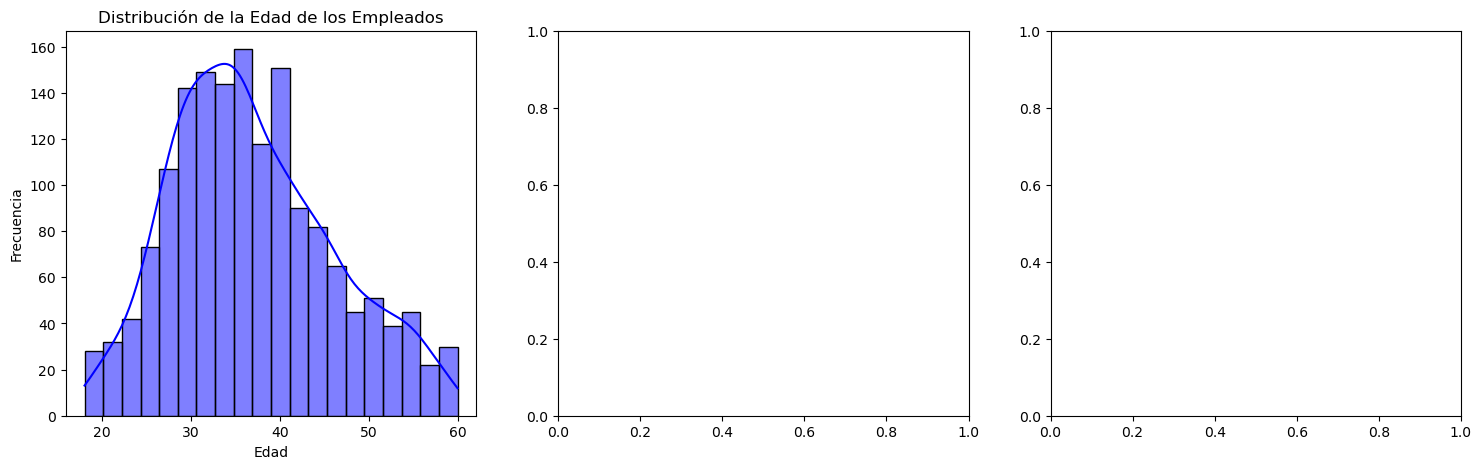

In [25]:
# Crear figuras
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de Edad
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de la Edad de los Empleados')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Histograma de Salario
sns.histplot(df['_salary'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución de Salarios')
axes[1].set_xlabel('Salario (€)')
axes[1].set_ylabel('Frecuencia')

# Histograma de Balance Vida-Trabajo
sns.histplot(df['worklifebalance'], bins=4, discrete=True, ax=axes[2], color='red')
axes[2].set_title('Distribución del Balance Vida-Trabajo')
axes[2].set_xlabel('Nivel de Balance (1-4)')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Explicación de las gráficas:

1) Distribución de la Edad:
Se observa una concentración de empleados entre los 30 y 40 años.
Hay menor % de empleados jóvenes (menores de 25) y mayores de 55.

2) Distribución de Salarios:
La mayoría de los empleados tienen salarios en el rango de 25,000 a 65,000 $.
Hay valores extremos (>150,000 €) que pueden representar altos ejecutivos o cargos de Gerencia (que son datos atípicos)

3) Distribución del Balance Vida-Trabajo:
La mayoría de los empleados tienen un balance de vida-trabajo de nivel 3. Lo que representa que la mayoría considera que se encuentra medianamente satisfechos, y relativamente pocos empleados califican su balance en el nivel 1 es decir poco satisfechos, y un porcentaje mayor  (pero alejado de la media) considera que se encuentra muy satisfecho.


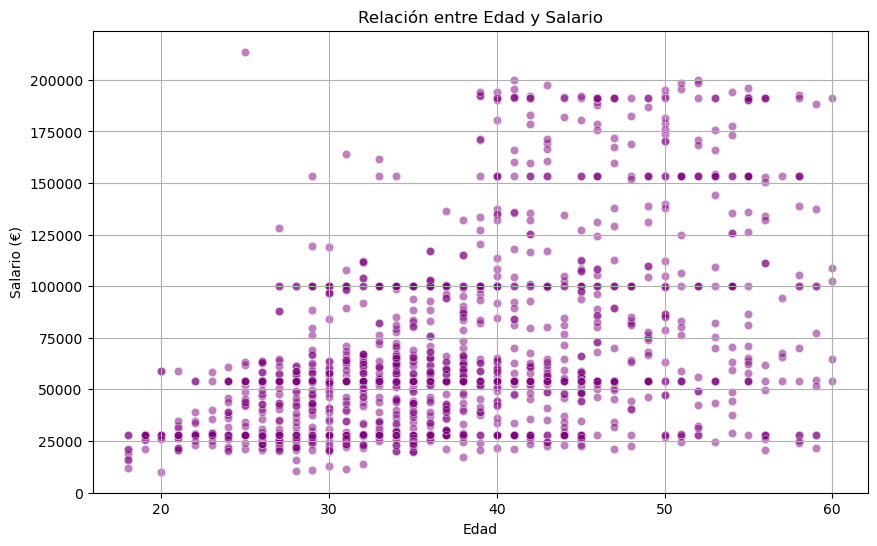

In [ ]:
# Gráfico de dispersión: Edad vs Salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['_salary'], alpha=0.5, color='purple')

plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario (€)')
plt.grid(True)
plt.show()

## Explicación de la gráfica:

Se puede observar que hay una tendencia que a mayor edad más años de experiencia y por ende mejor salario. Sin embargo vemos que representa un menor porcentaje el rango de edades de entre 40 y 50 años, con respecto al rango de edades de 30 a 40 años donde esta el grueso de personal con una banda salarial promedio entre  40,000 - 70,000 $.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_101180\2664458547.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue', 'pink'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_101180\2664458547.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue', 'pink'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_101180\2664458547.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annota

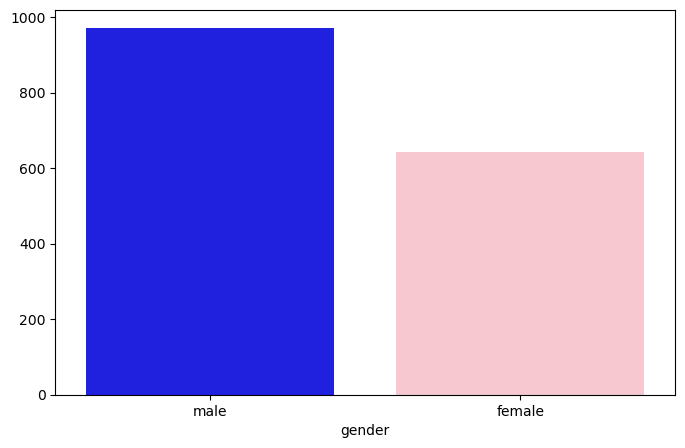

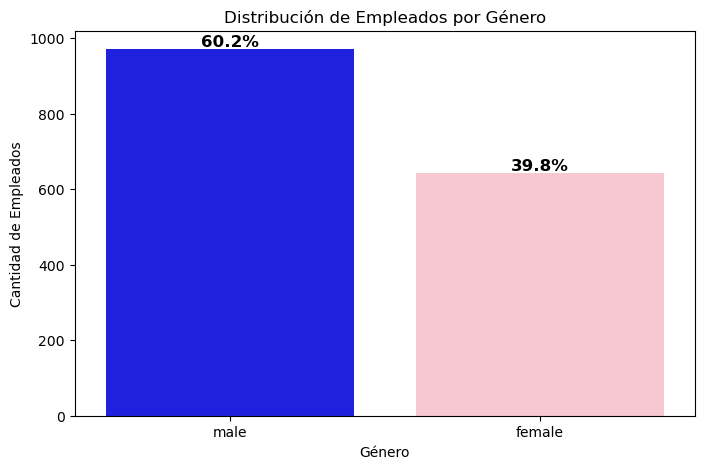

In [ ]:
# Contar la cantidad de empleados por género
gender_counts = df['gender'].value_counts()
total_empleados = gender_counts.sum()
gender_percentages = (gender_counts / total_empleados) * 100

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue', 'pink'])

# Crear gráfico de barras con etiquetas de porcentaje
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue', 'pink'])

# Agregar etiquetas con los porcentajes
for i, p in enumerate(ax.patches):
    ax.annotate(f'{gender_percentages[i]:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Configuración del gráfico
plt.title('Distribución de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.show()


## Explicación de las gráficas:
Podemos observar que existe un mayor % de hombres (60,2%) que de mujeres con un 39.8%, aunque con una tendencia a eliminar esa brecha y que se convierta en un 50/50.

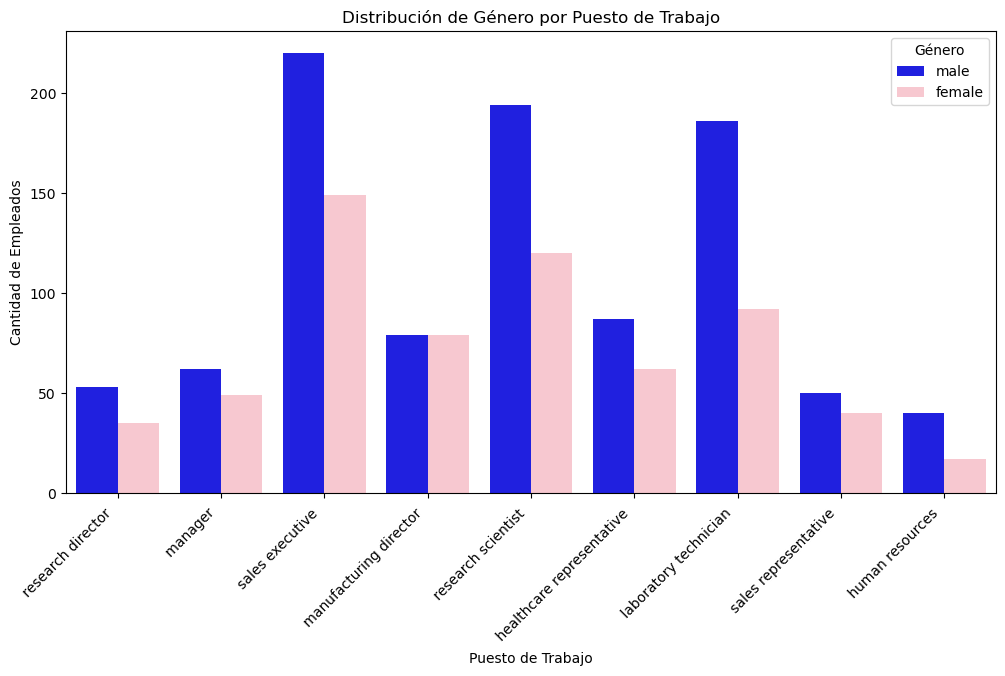

In [ ]:
# Crear gráfico de barras agrupado por jobrole y género
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='jobrole', hue='gender', palette=['blue', 'pink'])

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha="right")

# Títulos y etiquetas
plt.title('Distribución de Género por Puesto de Trabajo')
plt.xlabel('Puesto de Trabajo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Género')

# Mostrar el gráfico
plt.show()

## Explicación: 
Se observa que hay desbalance de género en ciertos puestos como Sales executive, research scientist y laboratory technician, siendo un mayor % el de hombres en estos puestos que el % de mujeres, esto podría indicar una posible desigualdad en la distribución de empleados por estos cargos. Sin embargo, en puestos de manager, manufacting director y healthcare representative tienen un % similar ambos géneros.

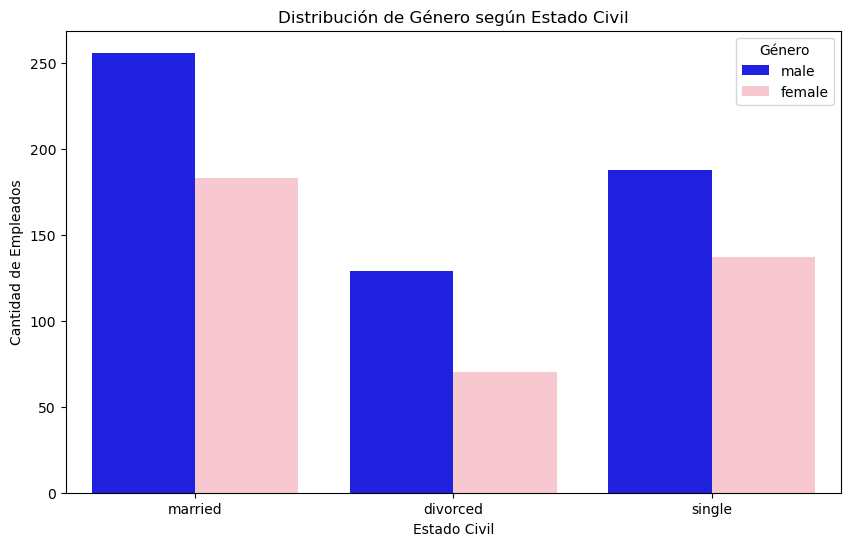

In [ ]:

# Crear gráfico de barras agrupado por maritalstatus y género
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='maritalstatus', hue='gender', palette=['blue', 'pink'])

# Títulos y etiquetas
plt.title('Distribución de Género según Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Género')

# Mostrar el gráfico
plt.show()

Se observa que hay un desequilibrio entre hombres y mujeres en todos los estados civiles, siendo el más representativo o con mayor diferencia porcentual, el estado civil "casado", ya que hay mas % de hombres casados que mujeres.

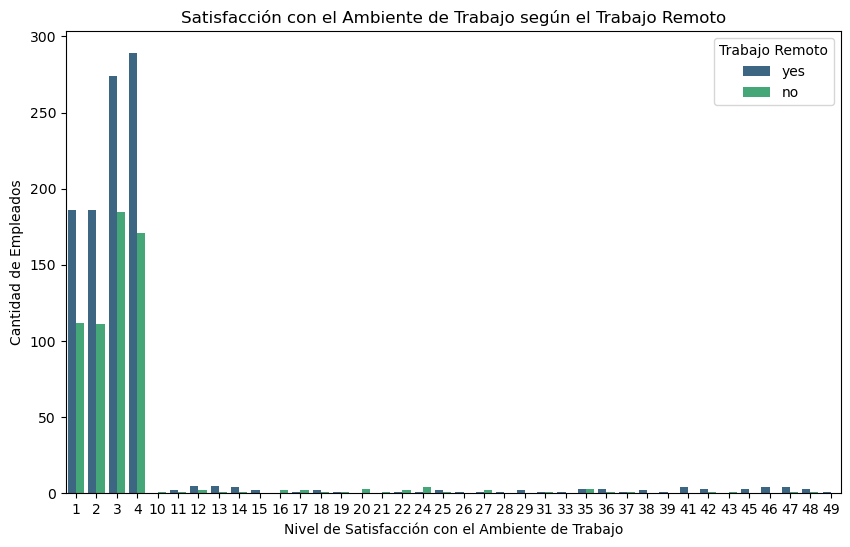

In [ ]:
# Crear gráfico de barras agrupado por environmentsatisfaction y remotework
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='environmentsatisfaction', hue='remotework', palette='viridis')

# Títulos y etiquetas
plt.title('Satisfacción con el Ambiente de Trabajo según el Trabajo Remoto')
plt.xlabel('Nivel de Satisfacción con el Ambiente de Trabajo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Trabajo Remoto')

# Mostrar el gráfico
plt.show()

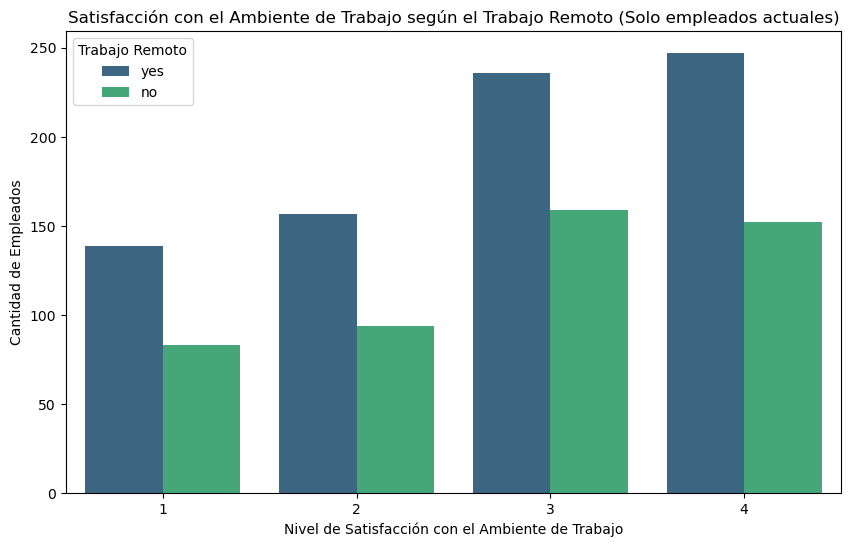

In [ ]:
# Filtrar los datos: satisfacción entre 1 y 4, y empleados que siguen en la empresa
df_filtrado = df[(df['environmentsatisfaction'].isin([1, 2, 3, 4])) & (df['attrition'] == 'No')]

# Crear gráfico de barras agrupado por environmentsatisfaction y remotework
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtrado, x='environmentsatisfaction', hue='remotework', palette='viridis')

# Títulos y etiquetas
plt.title('Satisfacción con el Ambiente de Trabajo según el Trabajo Remoto (solo empleados actuales)')
plt.xlabel('Nivel de Satisfacción con el Ambiente de Trabajo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Trabajo Remoto')

# Mostrar el gráfico
plt.show()


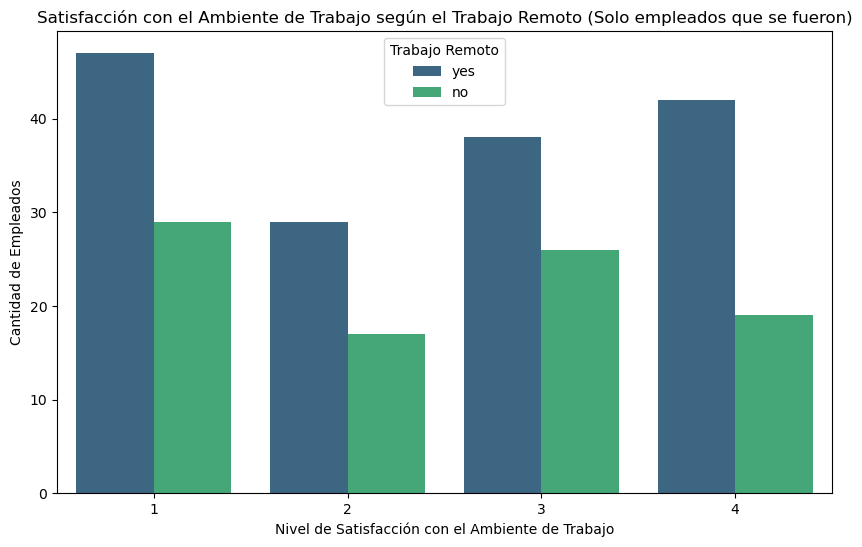

In [17]:
# Filtrar los datos: satisfacción entre 1 y 4, y empleados que ya no están en la empresa
df_filtrado = df[(df['environmentsatisfaction'].isin([1, 2, 3, 4])) & (df['attrition'] == 'Yes')]

# Crear gráfico de barras agrupado por environmentsatisfaction y remotework
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtrado, x='environmentsatisfaction', hue='remotework', palette='viridis')

# Títulos y etiquetas
plt.title('Satisfacción con el Ambiente de Trabajo según el Trabajo Remoto (Solo empleados que se fueron)')
plt.xlabel('Nivel de Satisfacción con el Ambiente de Trabajo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Trabajo Remoto')

# Mostrar el gráfico
plt.show()


## Explicación de la gráfica:
Se observa que los empleados que trabajan de forma remota están más satisfechos con el ambiente de trabajo en comparación con los que trabajan presencialmente.
Por ello los empleados presenciales tienen baja satisfacción, y podría indicar problemas con el ambiente laboral.
Por lo tanto, como vemos el trabajo remoto está más presente en los niveles de mayor satisfacción, podría ser un argumento a favor de políticas de teletrabajo a futuro.

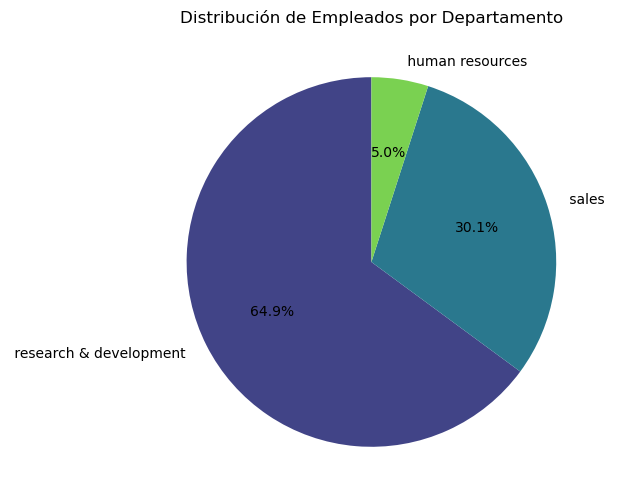

In [4]:
# Contar la cantidad de empleados por departamento
dept_counts = df['department'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', colors=['#414487FF', '#2A788EFF', '#7AD151FF'], startangle=90)

# Título
plt.title('Distribución de Empleados por Departamento')

# Mostrar el gráfico
plt.show()

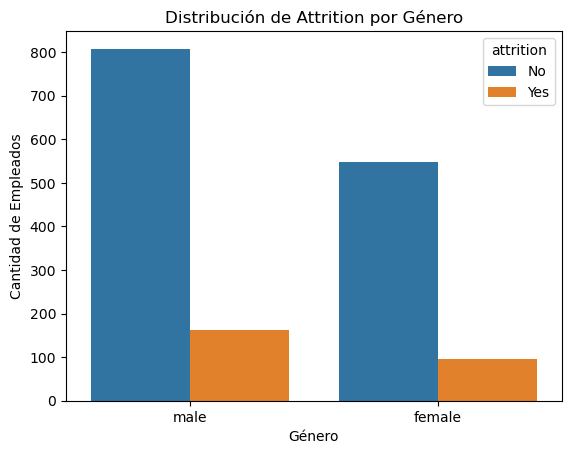

In [7]:
# Asegúrate de que las columnas que vamos a usar existen y están correctamente nombradas
# Por ejemplo: 'Gender' para género y 'Attrition' para rotación (ajusta según tu archivo)
sns.countplot(data=df, x='gender', hue='attrition')

# Títulos y etiquetas
plt.title('Distribución de Attrition por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')

# Mostrar la gráfica
plt.show()

## Explicación de esta gráfica:

En esta gráfica se puede observar qué departamento tiene más empleados y qué proporción ocupa cada uno en la empresa.
En este caso el departamento más dominante es research & development con un 64.9%, puede indicar concentración de personal en esta área.
Y un departamento con pocos empleados como recursos humanos podría necesitar más personal ya que solo representa un 5% del total.
Sin embargo vemos que sales representa un 30.1% con lo que observamos que tienen suficiente personal para el core business de la empresa.